In [2]:
import torch
import pandas as pd
import seaborn as sns

Choose data:

In [7]:
base = '/home/fpetruzzellis/Progetti/seq-mnist/data/interim/memory_readings/dntm/smnist/'
smnist = {
    "18-05-22": base + "smnist-2022-05-19/dntm_full.pth",  # BS=64
    "09-07-22": base + "smnist-2022-07-09-09-21/dntm_full.pth",
    "19-07-22": base + "smnist-2022-07-19-17-35/dntm_full.pth",  # lstm
    "25-07-22": base + "smnist-2022-07-25/dntm_full.pth",  # incomplete convergence
    "27-07-22": base + "smnist-2022-07-27/dntm_full.pth",
}

In [11]:
base = '/home/fpetruzzellis/Progetti/seq-mnist/data/interim/memory_readings/dntm/pmnist/'
pmnist = {
    "02-06-22": base + "pmnist-2022-06-02/dntm_full.pth",  # BS=64
    "09-07-22": base + "pmnist-2022-07-09-18-14/dntm_full.pth",
    "14-07-22": base + "pmnist-2022-07-14_07-33/dntm_full.pth",
    "04-10-22": base + "pmnist-2022-10-04/dntm_full.pth",  # BS=64
}

In [22]:
base = '/home/fpetruzzellis/Progetti/seq-mnist/data/interim/memory_readings/dntm_var/smnist/'
smnist_var = {
    "29-07-22": base + "smnist-var-2022-07-29/dntm_var_full.pth",  # not converged
    "09-08-22": base + "smnist-var-2022-08-09/dntm_var_full.pth",  # first successful model
    "12-08-22": base + "smnist-var-2022-08-12/dntm_var_full.pth",  # reprise 1
    "17-08-22": base + "smnist-var-2022-08-17/dntm_var_full.pth",  # reprise 2
    "22-08-22": base + "smnist-var-2022-08-22/dntm_var_full.pth",  # reprise 3
}

In [28]:
base = '/home/fpetruzzellis/Progetti/seq-mnist/data/interim/memory_readings/dntm_var/pmnist/'
pmnist_var = {
    "25-08-22": base + "pmnist-var-2022-08-25/dntm_var_full.pth",  # pre-trained on sMNIST
    "01-09-22": base + "pmnist-var-2022-09-01/dntm_var_full.pth",  # not converged
    "02-09-22": base + "pmnist-var-2022-09-02/dntm_var_full.pth",  # not converged
    "29-09-22": base + "pmnist-var-2022-09-29/dntm_var_full.pth",  # batch-norm memory readings
}

---

In [4]:
sns.set(rc={'figure.figsize':(15,9)})

In [8]:
weights_df = pd.DataFrame()

for model, path in smnist.items():
    tmp_df = pd.DataFrame()
    model_weights = torch.load(path)
    tmp_df['name'] = [param_name 
                      for param_name in model_weights]
    tmp_df['2norm'] = [torch.norm(model_weights[param_name]).item() 
                       for param_name in model_weights]
    tmp_df['run'] = [model]*(len(model_weights))
    weights_df = pd.concat((weights_df, tmp_df))

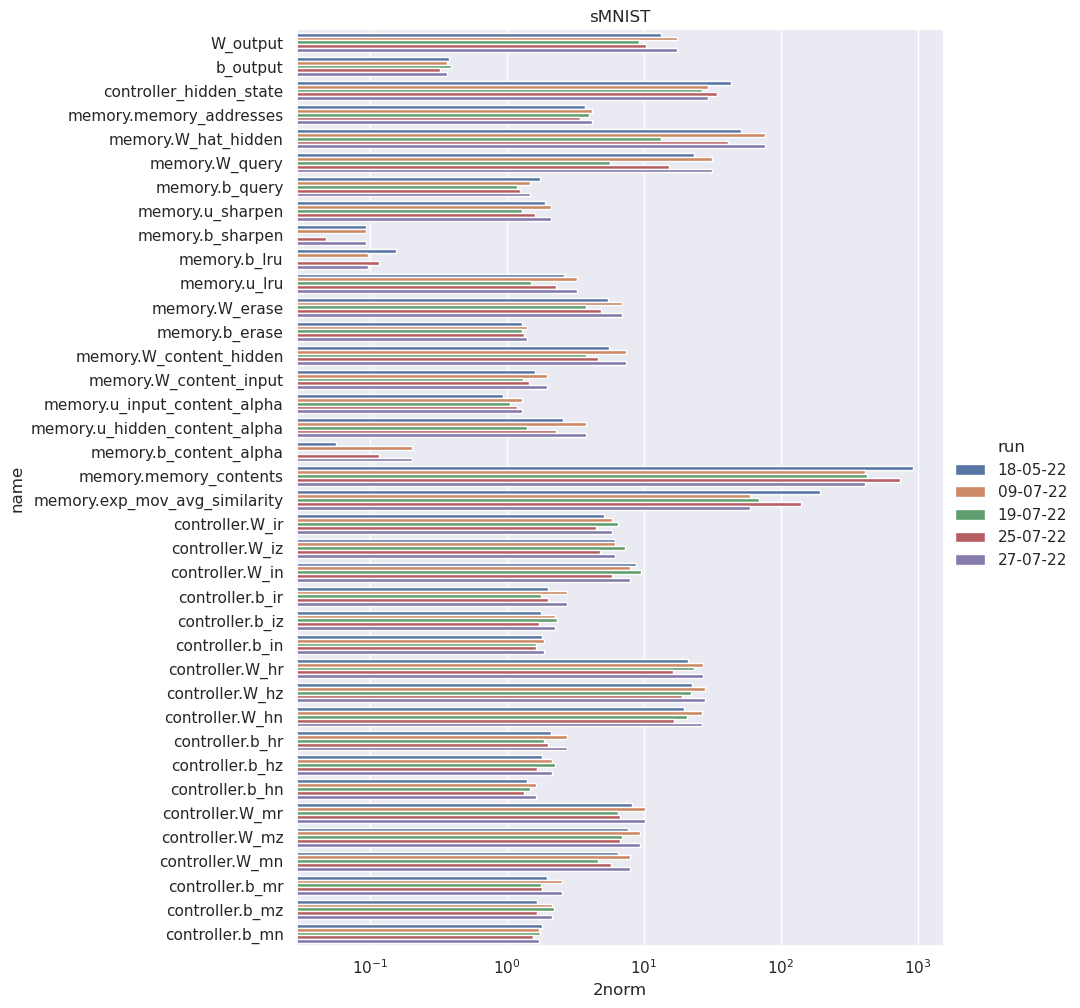

In [9]:
ax = sns.catplot(weights_df, x='2norm', y='name', hue='run', kind='bar', orient='h', height=10)
ax = ax.set(xscale='log', title='sMNIST')

In [12]:
weights_df = pd.DataFrame()

for model, path in pmnist.items():
    tmp_df = pd.DataFrame()
    model_weights = torch.load(path)
    tmp_df['name'] = [param_name 
                      for param_name in model_weights]
    tmp_df['2norm'] = [torch.norm(model_weights[param_name]).item() 
                       for param_name in model_weights]
    tmp_df['run'] = [model]*(len(model_weights))
    weights_df = pd.concat((weights_df, tmp_df))

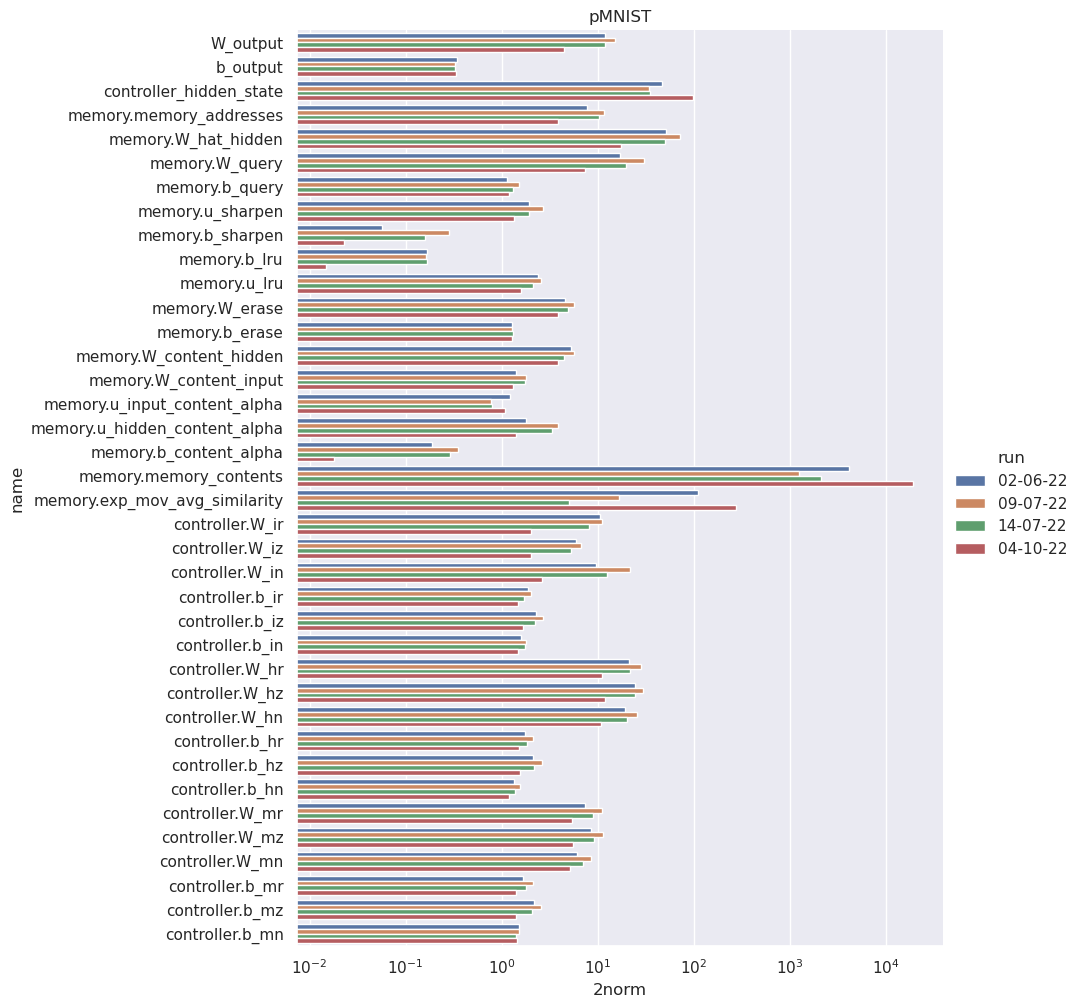

In [13]:
ax = sns.catplot(weights_df, x='2norm', y='name', hue='run', kind='bar', orient='h', height=10)
ax = ax.set(xscale='log', title='pMNIST')

In [23]:
weights_df = pd.DataFrame()

for model, path in smnist_var.items():
    tmp_df = pd.DataFrame()
    model_weights = torch.load(path)
    tmp_df['name'] = [param_name 
                      for param_name in model_weights] 
    tmp_df['2norm'] = [torch.norm(model_weights[param_name]).item() 
                       for param_name in model_weights]
    tmp_df['run'] = [model]*(len(model_weights))
    weights_df = pd.concat((weights_df, tmp_df))

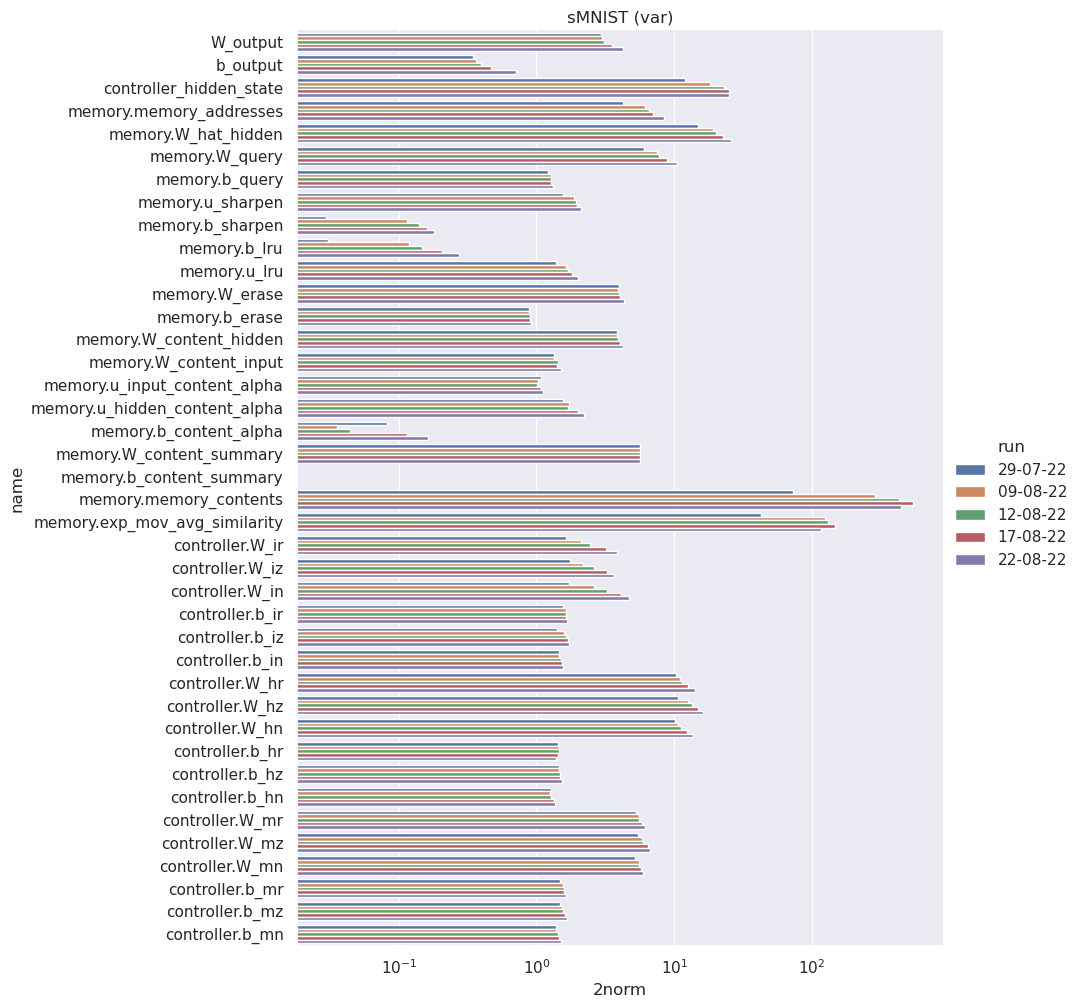

In [24]:
ax = sns.catplot(weights_df, x='2norm', y='name', hue='run', kind='bar', orient='h', height=10)
ax = ax.set(xscale='log', title='sMNIST (var)')

In [29]:
weights_df = pd.DataFrame()

for model, path in pmnist_var.items():
    tmp_df = pd.DataFrame()
    model_weights = torch.load(path)
    tmp_df['name'] = [param_name 
                      for param_name in model_weights] 
    tmp_df['2norm'] = [torch.norm(model_weights[param_name]).item() 
                       for param_name in model_weights]
    tmp_df['run'] = [model]*(len(model_weights))
    weights_df = pd.concat((weights_df, tmp_df))

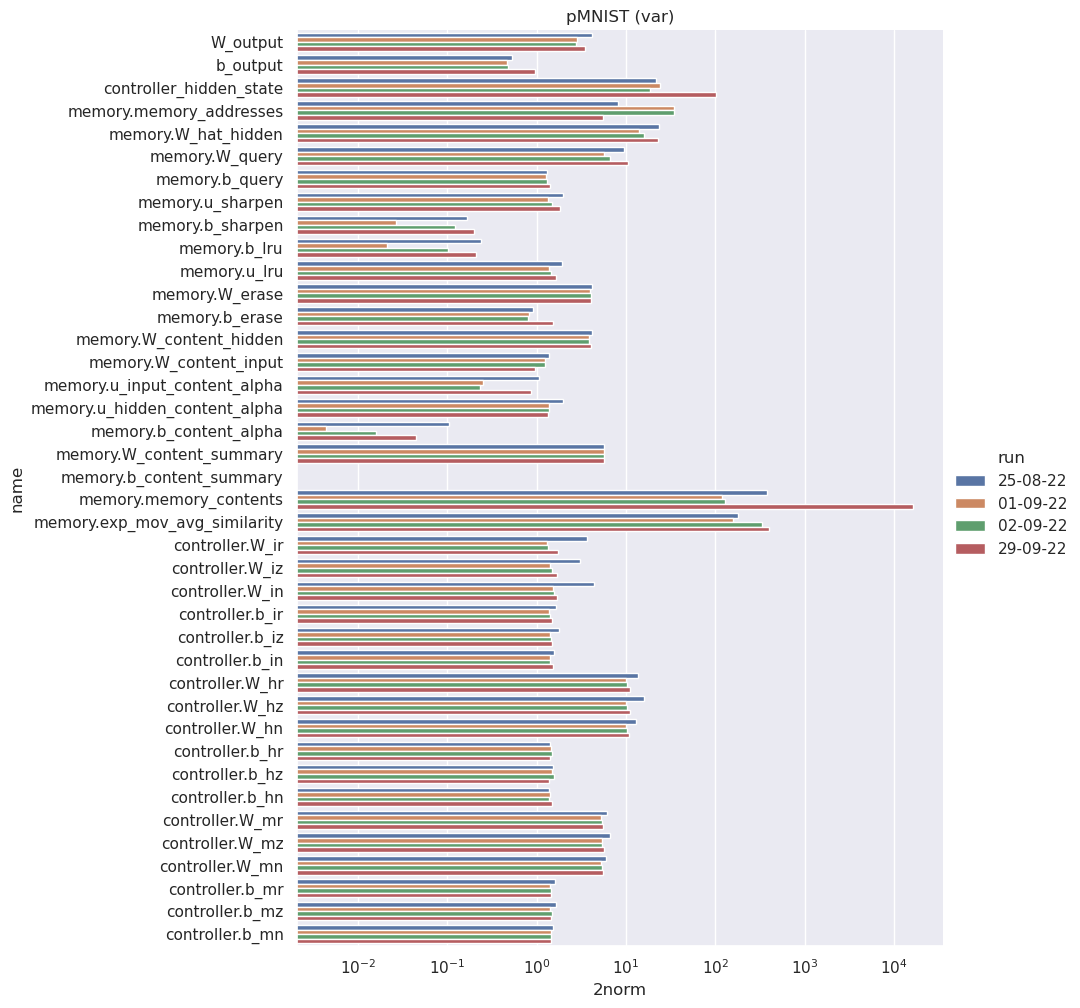

In [30]:
ax = sns.catplot(weights_df, x='2norm', y='name', hue='run', kind='bar', orient='h', height=10)
ax = ax.set(xscale='log', title='pMNIST (var)')

In [105]:
weights_df = pd.DataFrame()

for model, path in smnist.items():
    tmp_df = pd.DataFrame()
    model_weights = torch.load(path)
    tmp_df['name'] = [param_name 
                      for param_name in model_weights]
    tmp_df['2norm'] = [torch.norm(model_weights[param_name]).item() 
                       for param_name in model_weights]
    tmp_df['run'] = [model]*(len(model_weights))
    weights_df = pd.concat((weights_df, tmp_df))

for model, path in smnist_var.items():
    tmp_df = pd.DataFrame()
    model_weights = torch.load(path)
    tmp_df['name'] = [param_name 
                      for param_name in model_weights]
    tmp_df['2norm'] = [torch.norm(model_weights[param_name]).item() 
                       for param_name in model_weights]
    tmp_df['run'] = [model + '(var)']*(len(model_weights))
    weights_df = pd.concat((weights_df, tmp_df))

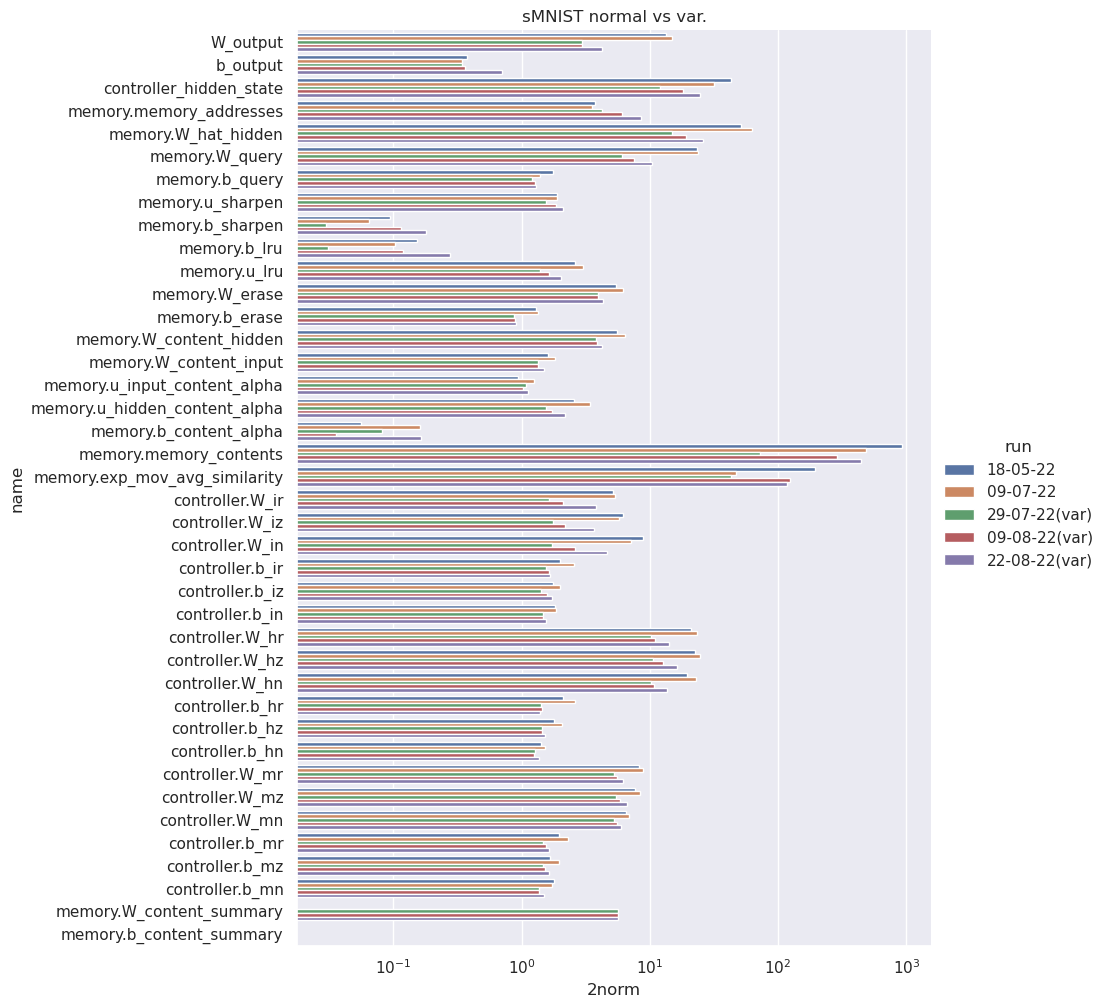

In [107]:
ax = sns.catplot(weights_df, x='2norm', y='name', hue='run', kind='bar', orient='h', height=10)
ax = ax.set(xscale='log', title='sMNIST normal vs var.')

In [125]:
W_o_df = pd.DataFrame()
for model, path in smnist.items():
    tmp_df = pd.DataFrame()
    model_weights = torch.load(path)
    W_o_flatten = model_weights["W_output"].cpu().flatten().numpy()
    tmp_df['$W_o$'] = W_o_flatten
    tmp_df['run'] = [model]*len(W_o_flatten)
    W_o_df = pd.concat((W_o_df, tmp_df))

for model, path in smnist_var.items():
    tmp_df = pd.DataFrame()
    model_weights = torch.load(path)
    W_o_flatten = model_weights["W_output"].cpu().flatten().numpy()
    tmp_df['$W_o$'] = W_o_flatten
    tmp_df['run'] = [model+"(var)"]*len(W_o_flatten)
    W_o_df = pd.concat((W_o_df, tmp_df))

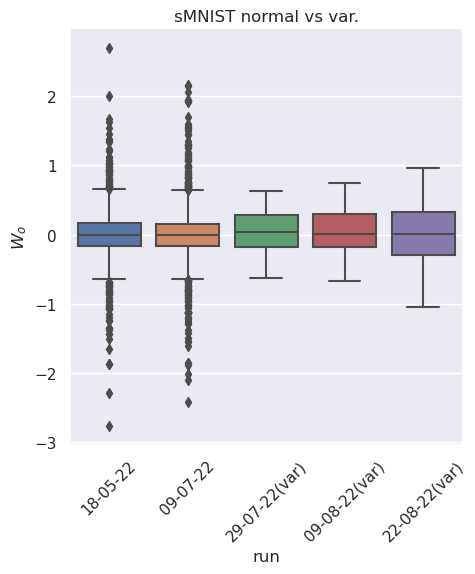

In [129]:
plot = sns.catplot(W_o_df, x='run', y='$W_o$', kind='box')
for ax in plot.axes.flat:
    ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plot = plot.set(title='sMNIST normal vs var.')